# Homework 5

# REST API

The task is to retrieve information about Nobel Prizes in physics from the Nobel Prize REST API. The data should be fetched in JSON format, and the API documentation offers instructions on how to structure requests and interpret the responses. The JSON output should match the specified format provided in the documentation.

In [20]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import wordcloud as wc
from bs4 import BeautifulSoup


# Define the Nobel Prize API endpoint
URI = 'http://api.nobelprize.org/2.0/nobelPrizes?limit=200&nobelPrizeYear=1901&yearTo=2024&nobelPrizeCategory=phy'

# Fetch data from the API
response = requests.get(URI)
data = response.json()  # Parse JSON response


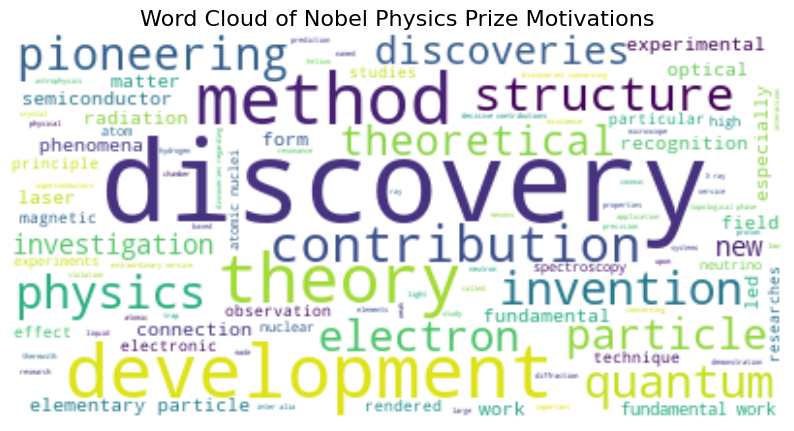

In [17]:

# Initialize a variable to store all motivations
motivation = ''

# Loop through each Nobel Prize entry
for prize in data.get('nobelPrizes', []):  # Safely handle if 'nobelPrizes' key is missing
    for laureate in prize.get('laureates', []):  # Loop through laureates for each prize
        motivation_text = laureate.get('motivation', {}).get('en', '')  # Get the English motivation
        motivation += f"{motivation_text} "  # Append to the combined string

# Replace specific terms to avoid splitting important words
motivation = motivation.replace('x-rays', 'xrays')

# Create a word cloud
stopwords = set(wc.STOPWORDS)  # Define stopwords
wordcloud = wc.WordCloud(background_color='white', stopwords=stopwords, max_words=100).generate(motivation)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Nobel Physics Prize Motivations', fontsize=16)
plt.show()



# Web Scraping

Create a web scraper that generates the following table:

In [22]:
titles = []
stars = []
prices = []
upcs = []

for i in range(3):
    URL = f'https://books.toscrape.com/catalogue/page-{i+1}.html'
    r = requests.get(URL) 
    html = BeautifulSoup(r.content)
    
    ol = html.find('ol')
    
    for li in ol.find_all('li'):
        URL2 = f'https://books.toscrape.com/catalogue/{li.h3.a["href"]}' #extract each book page
        r2 = requests.get(URL2)
        html2 = BeautifulSoup(r2.content)
        
        table = html2.find('table', class_ ='table table-striped') #the table
        upc = table.tr.td.text #extracts the upc in the table
        upcs.append(upc)
        
        head = html2.find('div', class_='col-sm-6 product_main')
        title = head.h1.text #extracts the title
        titles.append(title)
        
        price = head.p.text #extracts the price
        prices.append(price)
        
        star_rating = head.find('p', class_='star-rating') #finds the star-rating
        star= star_rating['class'][1] #extract the raiting
        stars.append(star)

In [24]:
scraped = {'upc':upcs, 'title':titles, 'price':prices, 'rating':ratings}

pd.DataFrame(scraped).head()

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,£51.77,Three
1,90fa61229261140a,Tipping the Velvet,£53.74,One
2,6957f44c3847a760,Soumission,£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five


The table contains details about books, summarized with the following columns, UPC, Titel, Price and rating. 